# Neural Network From Scratch

This notebook provides an intuitive understanding of the mechanism of the neural network, or deep learning.

Important steps in neural network:

- forward propagation
    - matrix multiplication
    - weights, biases, and activation functions
- back propagation
    - derivatives and partial derivatives
    - chain rules
- gradient descent 
    - Batch
    - Mini-batch
    - Stochastic gradient descent

## Neural Network

- Neural network is a type of machine learning algorithm modeled on human brains and nervous system.
- The model is believed to process information in a similar way to the human brain.
- A neural network often consists of a large number of elements, known as **nodes**, working in parallel to solve a specific problem. These nodes are often organized into different **layers**.


---

![](../images/neural-network-sample.png)

---

## Building a Neural Network Model

![](../images/neural-network-flowchart.png)

- Forward Propagation: It refers to the process of transforming the data values by moving the data through the network to get output.
- Calculate Total Error
- Calculate Gradients
- Update the weights

In [20]:
import numpy as np
import matplotlib.pylab as plt

## Linear Algebra and Matrix

- 2D matrix

$$
\begin{pmatrix}
1&2 \\
3&4 \\
5&6 \\
\end{pmatrix}
$$

- Matrix Multiplication


$$\begin{pmatrix}
1&2 \\
3&4 \\
\end{pmatrix}
\begin{pmatrix}
5&6 \\
7&8
\end{pmatrix} =
\begin{pmatrix}
19&22 \\
43&50
\end{pmatrix}
$$

## Activation Functions

In neural network, the activation function of a node determines whether the node would activate the output given the input values. Different types of activation functions may determine the cut-offs for output activation in different ways.

- sigmoid function

$$ h(x) = \frac{1}{1 + \exp(-x)}$$

- step function

$$ h(x)= \left\{ 
     \begin{array}\\
     0 & (x \leq 0) \\
     1 & (x > 0)
     \end{array}
\right.
$$

- ReLU function

$$ h(x)= \left\{ 
     \begin{array}\\
     x & (x > 0) \\
     0 & (x \leq 0)
     \end{array}
\right.
$$

- Softmax function


$$
y_k = \frac{\exp(a_k)}{\sum_{i = 1}^{n} {a_i}}
$$

In [21]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def relu(x):
    return np.maximum(0,x)


# def softmax(x):
#     exp_x = np.exp(x)
#     sum_exp_x = np.sum(exp_x)
#     y = exp_x/sum_exp_x
#     return y

def softmax(x):
    c = np.max(x)
    exp_x = np.exp(x-c) # avoid overflow issues
    sum_exp_x = np.sum(exp_x)
    y = exp_x/sum_exp_x
    return y

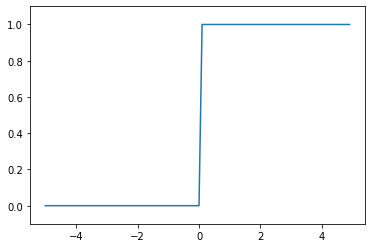

In [22]:
# step function
x = np.arange(-5.0, 5.0, 0.1)
plt.plot(x, step_function(x))
plt.ylim(-0.1, 1.1)
plt.show()

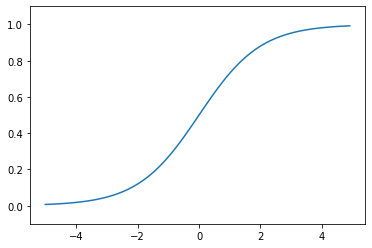

In [23]:
## sigmoid function
plt.plot(x, sigmoid(x))
plt.ylim(-0.1, 1.1)
plt.show()

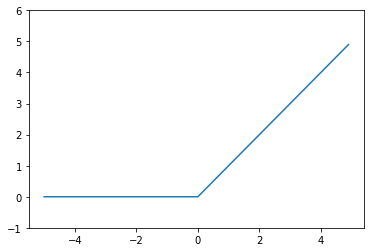

In [24]:
# ReLU
plt.plot(x, relu(x))
plt.ylim(-1, 6)
plt.show()

## Forward Propagation

![](../images/neural-network-sample2.png)

- Neural network is a model with weights for data/value transformation.
- The input data values will be transformed according to the weights of the neural network.
- Given a two-layer network, with two input values $x1$ and $x2$, to get the values of the three outputs in the second layer, $a_1^{(1)}$, $a_2^{(1)}$, $a_3^{(1)}$, we compute the dot product of the *X* and *W*.
    - *X* refers to the input vector/matrix
    - *W* refers to the network weights, which is a 2 x 3 matrix in the current example
    - The weights are represented as the links in-between the first and second layers
    - These weights can be mathematically represesnted as a 2 x 3 Matrix *W*
- Taking the dot product of the input values *X* and the weight matrix *W* is referred to as the **forward propagation** of the network.
- Forward propagation gives us the values of the nodes in the second layer

In [25]:
X = np.array([1,2])
X.shape

(2,)

In [26]:
W = np.array([[1,3,5],[2,4,6]])
W.shape

(2, 3)

In [27]:
Y = np.dot(X,W)
print(Y)

[ 5 11 17]


## Weights, Biases, and Activation Functions

- The output of a node in the network is computed as the sum of the weighted inputs and the bias. Take $a^{(1)}_1 $ for example:

$$ a^{(1)}_1 = w_{11}^{(1)}x_1 + w_{12}^{(1)}x_2 + b_1$$

- Then the output values go through the activation function and this result would indicate the final output of the node.

$$ z^{(1)}_1= h(a^{(1)}_1) $$

- Not all the nodes need to have an activation function.

In [28]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1,0.2,0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

(2,)
(2, 3)
(3,)


In [29]:
A1 = np.dot(X, W1) + B1
print(A1)


Z1 = sigmoid(A1)
print(Z1)

Z2 = softmax(A1)
print(Z2)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]
[0.21198272 0.31624106 0.47177622]


## Learning and Training

- Forward propagation shows how the network takes the input values, transforms them, and produces the output values based on the network parameters (i.e., weights).
- The network needs to learn the weights that best produce the output values according to some loss function.
- The key is we compute the differences between the real outputs of the network and the target outputs. The model should aim to minimize these differences, which are commonly referred to as **errors** of the model.


## Loss Functions

![](../images/neural-network-sample3.png)

- If the target ouputs are numeric values, we can evaluate the errors (i.e., the differences between the actual model outputs and the target outputs) using the **mean square error** function.
- If the target outputs are labels, we can evaluate the errors (i.e., the differences between the actual model labels and the target labels) using the **cross entory error** function.
- The function used to compute the errors of the model is referred to as the **loss function**.

### Error based on One Sample

- Mean Square Error 

$$E = \frac{1}{2}\sum(y_k - t_k)^2$$

- Cross Entropy Error

$$E= -\sum_{k}t_k\log(y_k)$$

In [30]:
def mean_square_error(y, t):
    return(0.5 * np.sum((y-t)**2))

def cross_entropy_error(y, t):
    delta = 1e-7 # avoid log(0)
    return -np.sum(t * np.log(y + delta))

In [31]:
## mean square error
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # predicted values
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # true label
print(mean_square_error(np.array(y),  np.array(t)))
print(cross_entropy_error(np.array(y), np.array(t)))

0.09750000000000003
0.510825457099338


### Errors based on Batch Samples

- If the training is based on a sample of batch size *N*, we can compute the average loss (or total errors) of the batch sample:

$$ E = - \frac{1}{N}\sum_n\sum_k t_{nk}\log y_{nk}$$

- We can revise the `cross_entropy_error()` function to work with outputs from a min-batch sample.

In [32]:
# adjust the function to for batch sample outputs
def cross_entropy_error(y, t):
    if y.ndim==1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y + 1e-7))/batch_size 

- When the labels uses one-hot encoding, the function can be simplified as follows:

In [33]:
def cross_entropy_error(y, t):
    if y.ndim==1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    # because for one-hot labels
    # cross-entropy sums only the values of the true labels `1`
    return -np.sum(np.log(y[np.arange(batch_size),t] + 1e-7))/batch_size

## Gradient Descent

- With the Loss Function, we can now perform the most important step in model training -- adjusting the weights of the model.
- The mechanism behind the neural network training steps is that we need to figure out:
    - how the change of a specific parameter (i.e., weight) in the model may lead to the change (i.e., decrease) of the values from the Loss Function? (i.e., How much does a change in a specific weight affect the total error?)
- Then we would know how much of the total error each wight in the model is responsible for.
- These turn out to be the basis for parameter adjustments.
- The error that a specific weight is responsible for is referred to as the **gradient** of the parameter.
- Mathematically, the gradient of a weight is the partial derivative of a weight in relation to the loss function.

### Partial Derivative

- Once if we have defined the loss function for the model, we can calculate to what extent the change in weights would affect the change in loss function
- The partial derivative refers to how a change in a specific weight $W_1$ affects the total error.

$$\frac{\partial E}{\partial W_1}$$

### Chain Rule and Back Propagation

- Because there are many parameters in a network, we can compute the gradients (or partial derivatives) of all the weights using the chain rules of derivatives.
- Specifically, the total error is essentially broken up and distributed back through the network to every single weight with the help of chain rule:

$$\frac{\partial z}{\partial x} = \frac{\partial z}{\partial y}.\frac{\partial y}{\partial x}$$

- This process is referred to as **back propagation**: moving back through the network, back-propagating the total errors to every single weight, and updating the weights.
- The principle of weights-updating: the larger the gradient, the more the adjustments.

$$W_1 = W_1 - \eta \frac{\partial E}{\partial W_1}$$

- The above adjustment formula suggests that the weight updates are proportional to the partial derivatives of the weight. 
- The **$\eta$** in the formula controls the amount of adjustment, which is referred to as the **learning rate**.

## Math on Derivatives

- Function for derivatives

In [34]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h)-f(x-h))/(2*h)


def tangent_line(f, x):
    d = numerical_diff(f, x)
    #print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

- Take the derivates of the following function when x = 5 and 10:

$$y = 0.01x^2 + 0.1x$$

In [35]:
def fun_1(x):
    return 0.01*x**2 + 0.1*x

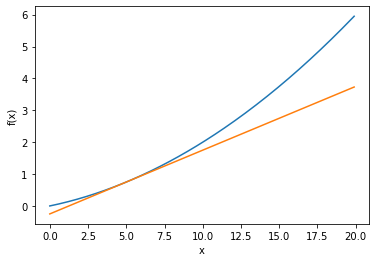

In [36]:
# plot the function
x = np.arange(0.0, 20.0, 0.1)
y = fun_1(x)
tf = tangent_line(fun_1, 5)
y5 = tf(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.plot(x,y5)
plt.show()

In [37]:
print(numerical_diff(fun_1, 5))
print(numerical_diff(fun_1, 10))

0.1999999999990898
0.2999999999986347


## Math on Partial Derivaites

- Take the partial derivatives of the following function:

$$ f(x_0, x_1)=x_0^2 + x_1^2 $$

In [38]:
## fun_2 has two variables/weights
def fun_2(x):
    return x[0]**2+x[1]**2

- When $x_0=3$ and $x_1=4$, compute the partial derivative of $x_0$, $\frac{\partial f}{\partial x_0}$

In [39]:
def fun_2_tmp1(x0):
    return x0**2+4.0**2

numerical_diff(fun_2_tmp1, 3.0)

6.00000000000378

- When $x_0=3$ and $x_1=4$, compute the partial derivative of $x_1$, $\frac{\partial f}{\partial x_1}$

In [40]:
def fun_2_tmp2(x1):
    return 3.0**2+x1**2

numerical_diff(fun_2_tmp2, 4.0)

7.999999999999119

## Math on Gradients

- We can calculate the partial derivatives all at once,and represent them in a vector, which is referred to as **gradient**: $(\frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1})$

- Each value pair, $(x_0,x_1)$, should correspond to a gradient.

- Intuitive understanding of the gradient:
    - The gradient of a specific $(x_0,x_1)$ is a **vector** with the direction pointing at the **global minimum** of the function.
    - The more farther the $(x_0,x_1)$ is way from the global minimum, the larger the gradient vector.
    
- These gradients turn out to be the most important basis in neural network training.

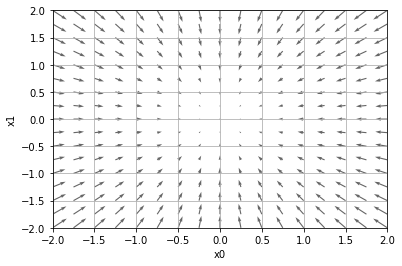

In [41]:
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  # 値を元に戻す
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y


if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]).T).T

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()


## References

- [Deep Learning From Scratch](https://www.books.com.tw/products/0010761759)
- [史上最完整機器學習自學攻略！我不相信有人看完這份不會把它加進我的最愛](https://buzzorange.com/techorange/2017/08/21/the-best-ai-lesson/)